# Flight Price Prediction

## 1. Problem Definition

**Objective**:  
The goal is to predict flight prices based on various factors such as the airline, journey date, source, destination, and additional details.  

**Target Variable**:  
`Price` (the flight price).  

**Features**:  
- `Airline`  : 
- `Date_of_Journey`  
- `Source`  
- `Destination`  
- `Route`  
- `Dep_Time`  
- `Arrival_Time`  
- `Duration`  
- `Total_Stops`  
- `Additional_Info`  

## Importing the main libraries which is use in this data analysing Notebook by the help of the Python 

In [3]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Collection

**Source**:  
The dataset is in an Excel file containing historical flight data.  

**Data Structure**:  
- **Columns**: `Airline`, `Date_of_Journey`, `Source`, `Destination`, `Route`, `Dep_Time`, `Arrival_Time`, `Duration`, `Total_Stops`, `Additional_Info`, and `Price`.  
- **Number of Entries**: 10,683 records.  


# Reading the data from Excel sheet
#### Data name is flight price in this data we perform the many EDA pard like data cleaning and the data encoding data type conversion. we also using the time and and ananlysing the time 

In [4]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Understanding the data by the help of the some basice function like info,shape , and describe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### when we using the info function we clearly see the most of the feature is object data type so we need to convert most of these into the relevent data type accordingly to requirements 

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In the above describe function we easilt see the function give the information about the price only so that most of the features in this data is object data type so we need to firstly convert into the relevent data type 


In [7]:
df.shape

(10683, 11)

## 3. Data Preprocessing


### Data Cleaning
- Handle missing values in `Route` and `Total_Stops` (e.g., fill missing values or remove rows with missing data).  
- Convert `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` to datetime format.  
- Handle any inconsistencies in `Total_Stops` (e.g., ensuring the values are in the correct format).  


In [8]:
# finding the missing Data into the data frame 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy='most_frequent' for categorical columns
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Route' and 'Total_Stops' columns
df1 = df.copy()
df[['Route', 'Total_Stops']] = imputer.fit_transform(df[['Route', 'Total_Stops']])

# Check the result
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
## chaking the duplicates into the data frame
df.duplicated().sum()

220

220 duplicated entreies in this data set but we can't remove this because many flight fly the same root many time so this opration is not important to use in this data 

In [11]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [12]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No Information')


In [13]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Information                     3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

### Feature Engineering
- Extract features like `Journey_day`, `Journey_month`, `Dep_hour`, `Dep_minute`, `Arrival_hour`, `Arrival_minute`, etc., from `Date_of_Journey`, `Dep_Time`, and `Arrival_Time`.  
- Convert categorical features (`Airline`, `Source`, `Destination`, `Route`, `Additional_Info`) into numerical representations using techniques like one-hot encoding or label encoding.  


In [14]:
# import datetime
# df['Day_Name'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.day_name()


In [15]:
# import pandas as pd

# # Sample DataFrame
# df = pd.DataFrame({'Date': ['21/3/2024', '22/3/2024', '23/3/2024']})

# # Convert the 'Date' column to datetime format and extract the day name
# df['Day_Name'] = pd.to_datetime(df['Date'], dayfirst=True).dt.day_name()

# print(df)


In [16]:

# def extract_day_month_year(df, Date_of_Journey):
#     # Ensure the column exists
#     if Date_of_Journey not in df.columns:
#         raise ValueError(f"The column '{Date_of_Journey}' does not exist in the DataFrame.")
    
#     # Remove the time portion, if present
#     df[Date_of_Journey] = df[Date_of_Journey].apply(lambda x: x.split(' ')[0])
    
#     # Split the date once and create new columns
#     date_parts = df[Date_of_Journey].str.split('/', expand=True)
    
#     df['Day'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.day_name()
#     df['month'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.month_name()
#     # df['Year'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.year_name()
    
#     df.drop('Date_of_Journey',axis=1,inplace=True)
#     return df

# # Example usage
# # Assuming `df` is your DataFrame with a 'Date_of_Journey' column
# df = extract_day_month_year(df, 'Date_of_Journey')


In [17]:

def extract_day_month_year(df, Date_of_Journey):
    # Ensure the column exists
    if Date_of_Journey not in df.columns:
        raise ValueError(f"The column '{Date_of_Journey}' does not exist in the DataFrame.")
    
    # Remove the time portion, if present
    df[Date_of_Journey] = df[Date_of_Journey].apply(lambda x: x.split(' ')[0])
    
    # Split the date once and create new columns
    date_parts = df[Date_of_Journey].str.split('/', expand=True)
    df['Day'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.day_name()
    df['month'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.month_name()
    df['year'] = date_parts[2].astype(int)
    df.drop('Date_of_Journey',axis=1,inplace=True)
    return df

# Example usage
# Assuming `df` is your DataFrame with a 'Date_of_Journey' column
df = extract_day_month_year(df, 'Date_of_Journey')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10683 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  object
 11  month            10683 non-null  object
 12  year             10683 non-null  int32 
dtypes: int32(1), int64(1), object(11)
memory usage: 1.0+ MB


In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Wednesday,May,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Sunday,June,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Sunday,May,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Friday,March,2019


Here we cleanng the arrivale time column and creating the arrivale mint arrivale hour 

In [20]:
def extract_arrival_time(df, arrival_time_column):
    # Split the 'Arrival_Time' to remove the date part (if any)
    df[arrival_time_column] = df[arrival_time_column].apply(lambda x: x.split(' ')[0])
    
    # Extract the hour and minute from the 'Arrival_Time' and convert them to integers
    df['arrival_hour'] = df[arrival_time_column].str.split(':').str[0].astype(int)
    df['arrival_mint'] = df[arrival_time_column].str.split(':').str[1].astype(int)
    
    return df

# Example of usage
df = extract_arrival_time(df, 'Arrival_Time')


In [ ]:
# def extract_arrival_time(df, arrival_time_column):
#     """
#     Extracts the hour and minute from a given arrival time column in a DataFrame.
    
#     Parameters:
#         df (pd.DataFrame): The input DataFrame containing the arrival time column.
#         arrival_time_column (str): The name of the column with arrival time data.
    
#     Returns:
#         pd.DataFrame: The DataFrame with new columns `arrival_hour` and `arrival_minute`.
#     """
#     # Ensure the column exists
#     if arrival_time_column not in df.columns:
#         raise ValueError(f"The column '{arrival_time_column}' does not exist in the DataFrame.")
    
#     # Remove the date part, if present
#     df[arrival_time_column] = df[arrival_time_column].str.split(' ').str[0]
    
#     # Split the time once and create new columns for hour and minute
#     time_parts = df[arrival_time_column].str.split(':', expand=True)
#     df['arrival_hour'] = time_parts[0].astype(int)
#     df['arrival_minute'] = time_parts[1].astype(int)
#     df.drop(['Arrival_Time'], axis=1, inplace=True)

#     return df


In [35]:
# df=extract_arrival_time(df,'Arrival_Time')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10683 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  object
 11  month            10683 non-null  object
 12  year             10683 non-null  int32 
 13  arrival_hour     10683 non-null  int32 
 14  arrival_mint     10683 non-null  int32 
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


Here we Create the ne

In [22]:
def extract_depature_time(df, Dep_Time):
    # Split the 'Dep_Time' to remove the date part (if any)
    df[Dep_Time] = df[Dep_Time].apply(lambda x: x.split(' ')[0])
    
    # Extract the hour and minute from the 'Dep_Time' and convert them to integers
    df['Dep_hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
    df['Dep_mint']=df['Dep_Time'].str.split(':').str[1].astype(int)  
    df.drop(['Dep_Time'], axis=1, inplace=True)

    return df

# Example of usage
df = extract_depature_time(df, 'Dep_Time')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10683 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  object
 10  month            10683 non-null  object
 11  year             10683 non-null  int32 
 12  arrival_hour     10683 non-null  int32 
 13  arrival_mint     10683 non-null  int32 
 14  Dep_hour         10683 non-null  int32 
 15  Dep_mint         10683 non-null  int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


## droping the arrivale and depature time from the data frame by the help of drop function 

In [24]:
df.drop([ 'Arrival_Time'], axis=1, inplace=True)


In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,month,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,March,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Wednesday,May,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Sunday,June,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Sunday,May,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Friday,March,2019,21,35,16,50


In [26]:
# # dd=pd.DataFrame({    'Duration': ['2h 50m', '7h 25m', '19h', '5h 25m'],
# })

In [27]:
# def con(d):
#     a_part=d.split()
#     h=int(a_part[0][:-1]) if 'h' in a_part[0] else 0
#     m=int(a_part[1][:-1] )if len(a_part) > 1 and 'm' in a_part[1] else 0

#     return h*60+m
# dd['time(mint)']=dd['Duration'].apply(con)
# # print(h)
# # print(m)
# # h_s=h[0]
# # print(h_s)
# # h_s=int(h)
# # m=int(m)
# # type(m)
# # type(h_s)
# dd.head()

In [28]:
# Convert "Duration" to total minutes
def convert_duration(duration):
    if pd.isna(duration):
        return None# Function to convert duration string to total hours (with fractions for minutes)
def convert_duration(duration):
    # Check for missing values and handle them
    if pd.isna(duration):
        return None
    
    # Split the duration string into parts based on spaces
    duration_parts = duration.split()
    
    # Extract hours from the first part if it contains 'h'
    hours = int(duration_parts[0][:-1]) if 'h' in duration_parts[0] else 0
    
    # Extract minutes from the second part if it exists and contains 'm'
    minutes = int(duration_parts[1][:-1]) if len(duration_parts) > 1 and 'm' in duration_parts[1] else 0
    # Convert total time to hours (minutes are divided by 60)
    total_hours = hours*60 + minutes
    
    return total_hours

# Example usage to apply the function to the 'Duration' column
# data['Duration_in_hours'] = data['Duration'].apply(convert_duration)

    parts = duration.split()
    hours = int(parts[0][:-1]) if 'h' in parts[0] else 0
    minutes = int(parts[1][:-1]) if len(parts) > 1 and 'm' in parts[1] else 0
    return hours  + minutes/60

# data['Duration_minutes'] = data['Duration'].apply(convert_duration)


In [29]:
# df['Duration(Hour)']=df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)
# df['Duration(mint)']=df['Duration'].str.split(' ').str[1].str.split('m').str[0].astype(int)

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,month,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,March,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Wednesday,May,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Sunday,June,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Sunday,May,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Friday,March,2019,21,35,16,50


In [31]:
df['total_duration(mint)']=df['Duration'].apply(convert_duration)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               10683 non-null  object
 1   Source                10683 non-null  object
 2   Destination           10683 non-null  object
 3   Route                 10683 non-null  object
 4   Duration              10683 non-null  object
 5   Total_Stops           10683 non-null  object
 6   Additional_Info       10683 non-null  object
 7   Price                 10683 non-null  int64 
 8   Day                   10683 non-null  object
 9   month                 10683 non-null  object
 10  year                  10683 non-null  int32 
 11  arrival_hour          10683 non-null  int32 
 12  arrival_mint          10683 non-null  int32 
 13  Dep_hour              10683 non-null  int32 
 14  Dep_mint              10683 non-null  int32 
 15  total_duration(mint)  10683 non-null

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,month,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint)
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,March,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Wednesday,May,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Sunday,June,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Sunday,May,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Friday,March,2019,21,35,16,50,285


In [34]:
df.drop(['Duration'],axis=1,inplace=True)

In [35]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,month,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,Sunday,March,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,Wednesday,May,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,Sunday,June,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,Sunday,May,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,Friday,March,2019,21,35,16,50,285


In [36]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Information                     3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# Analysing the data 

In [37]:
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if df[col].dtype != 'object']
print(categorical)
print(numerical)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Day', 'month']
['Price', 'year', 'arrival_hour', 'arrival_mint', 'Dep_hour', 'Dep_mint', 'total_duration(mint)']


In [38]:
! pip install sweetviz


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import sweetviz as sv
report = sv.analyze(df,target_feat='Price')
report.show_html('Sweetviz_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



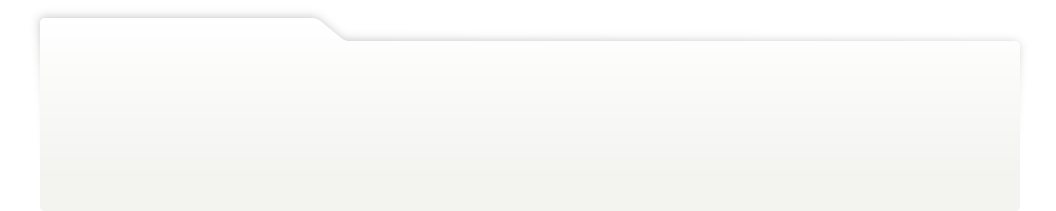
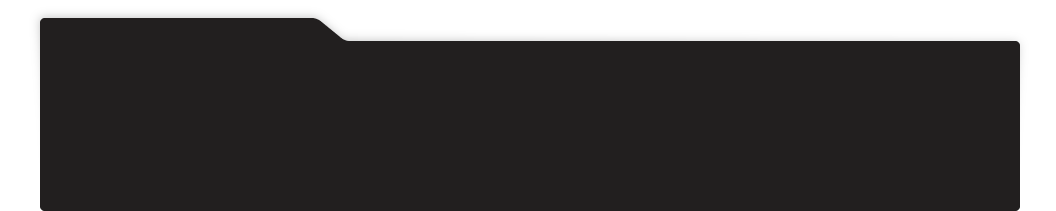
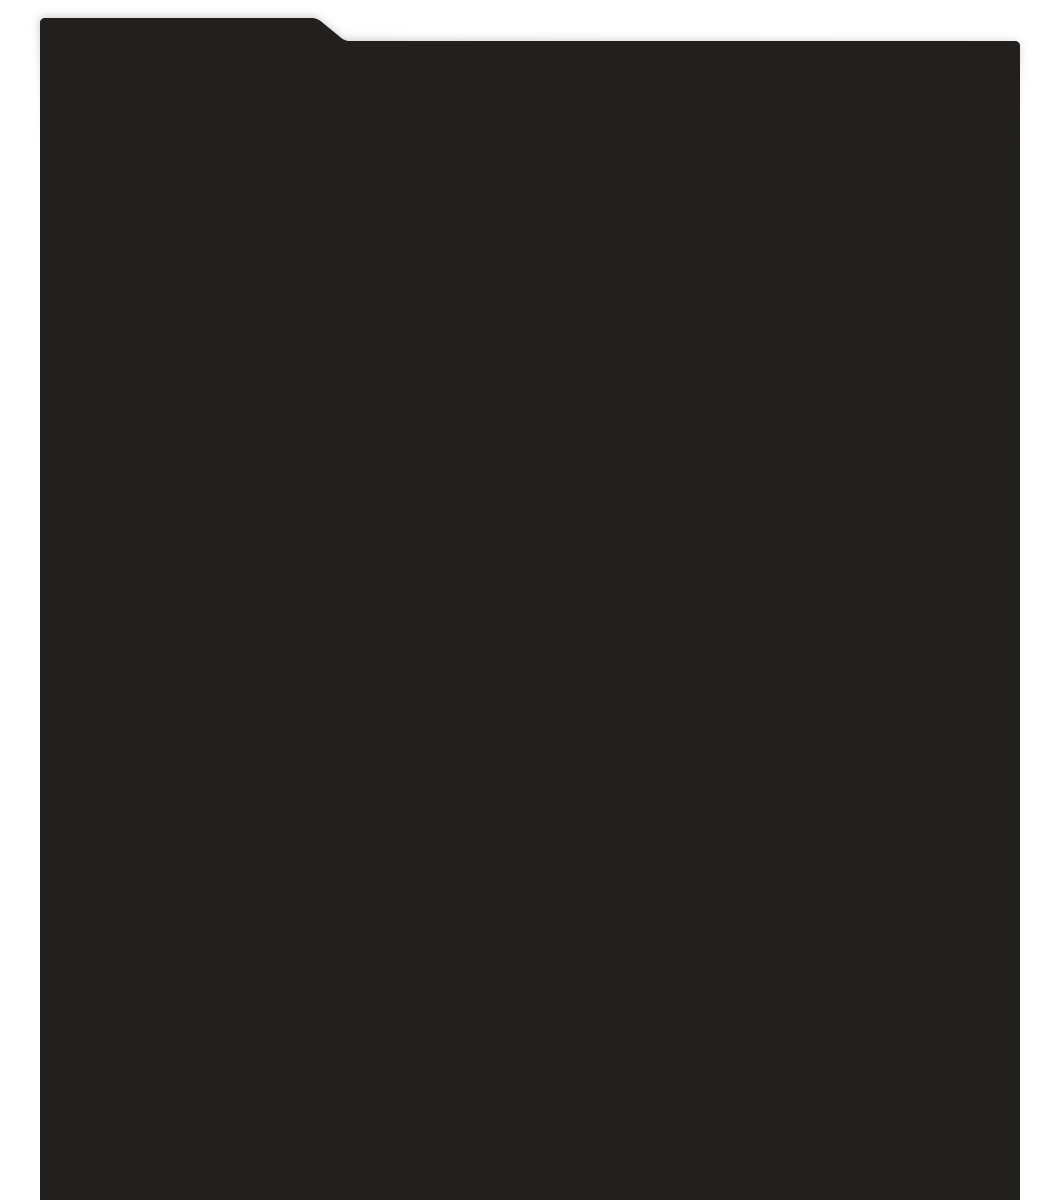
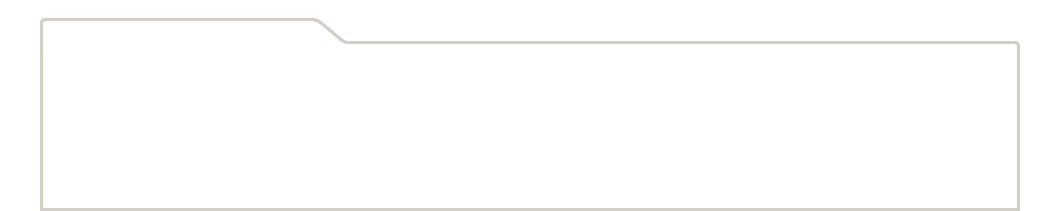
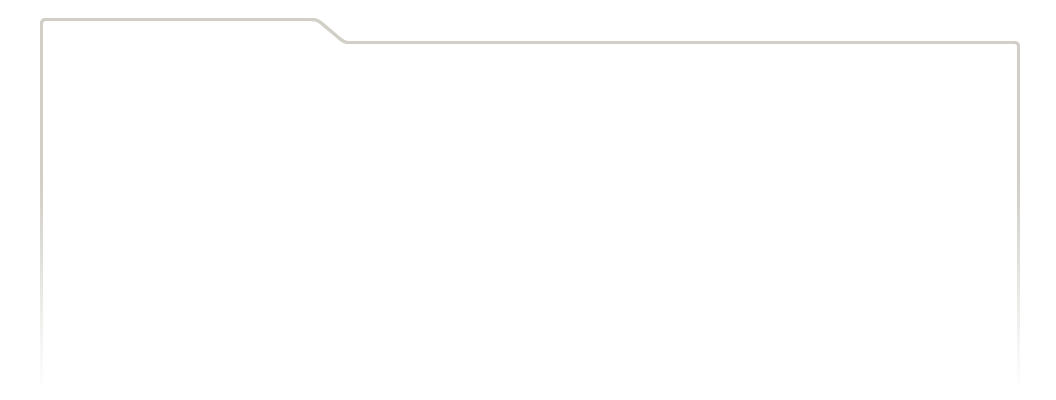
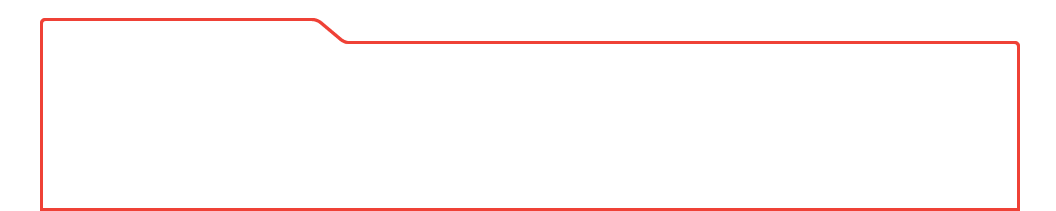
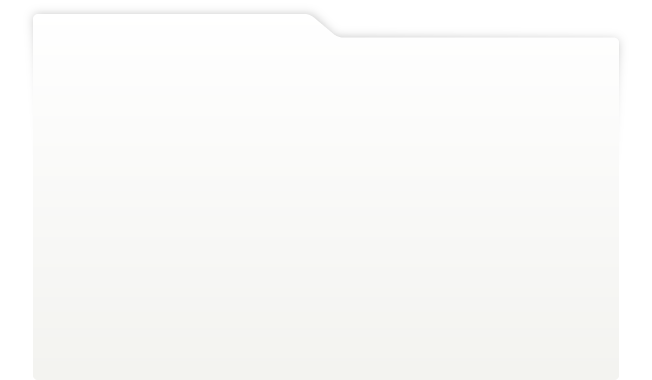
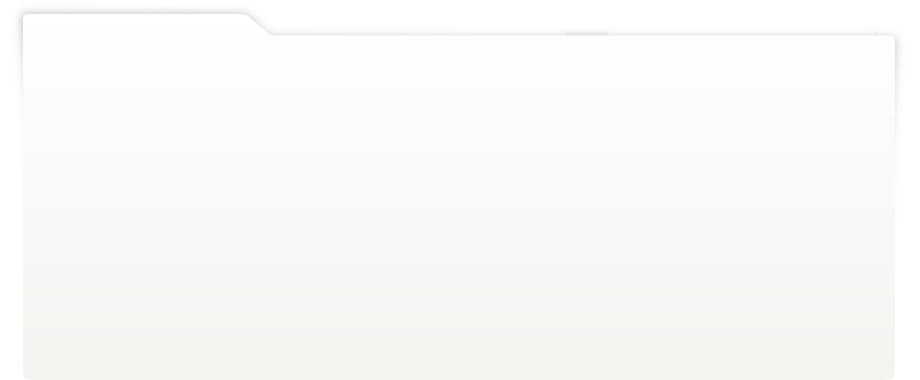
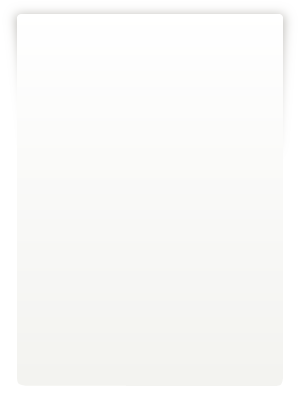
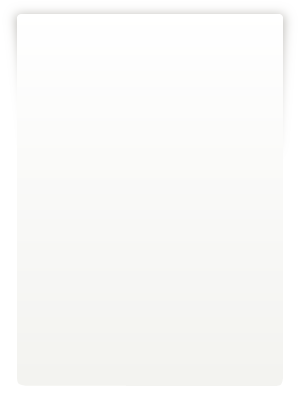
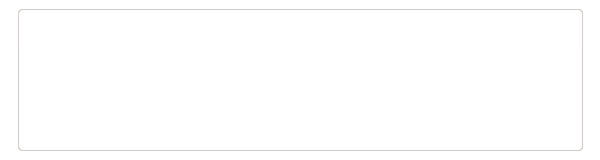
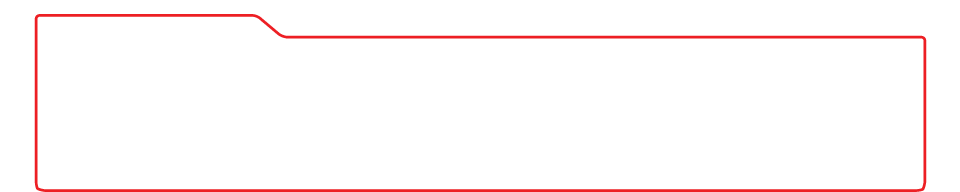
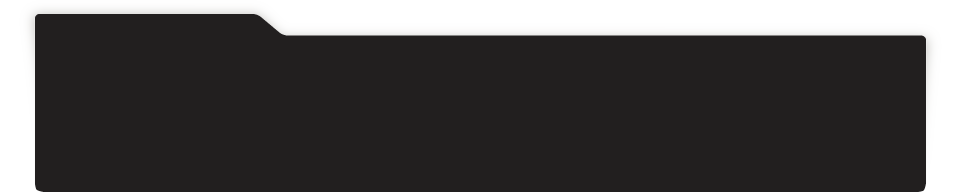
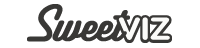
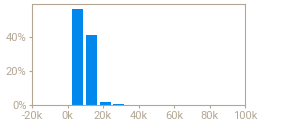
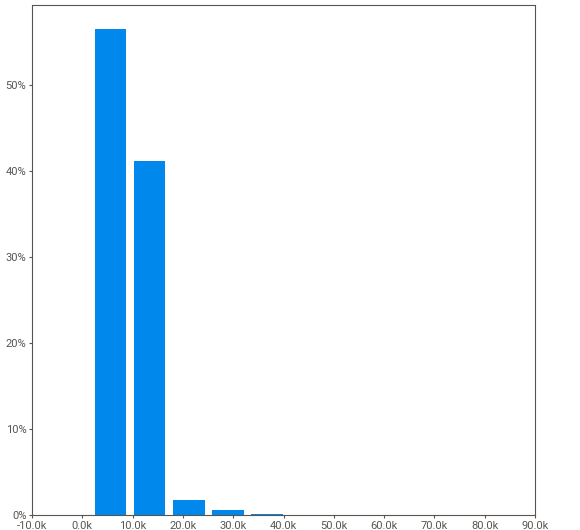
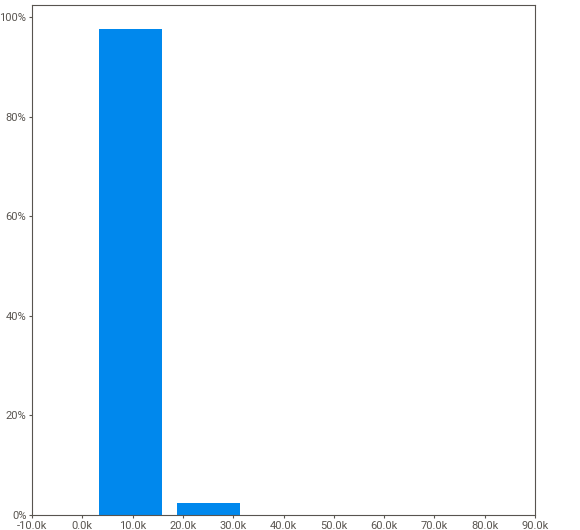
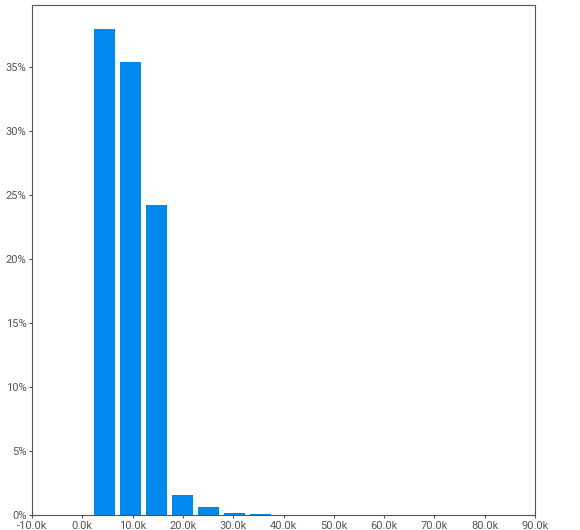
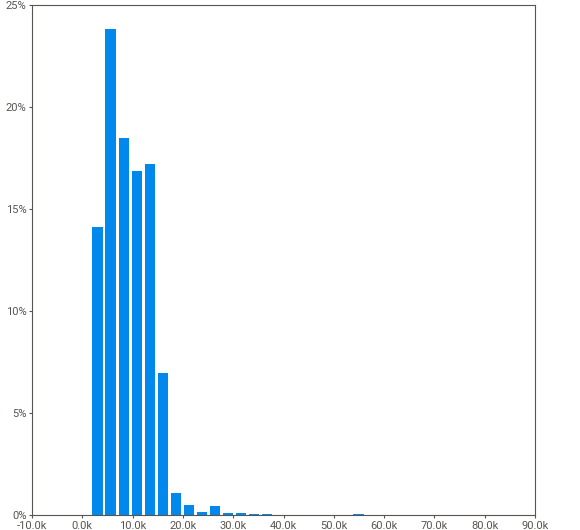
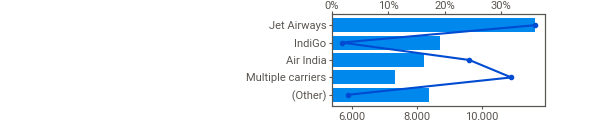
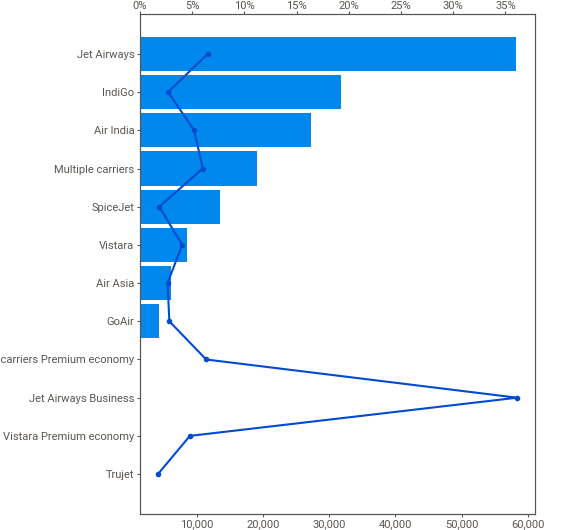
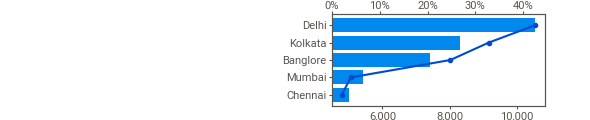
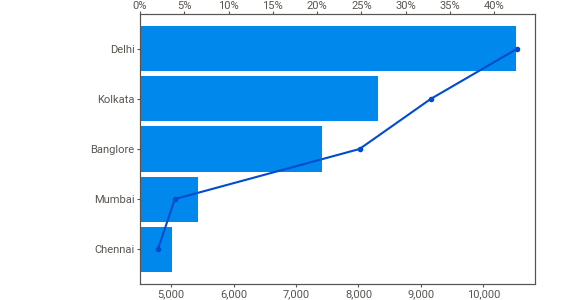
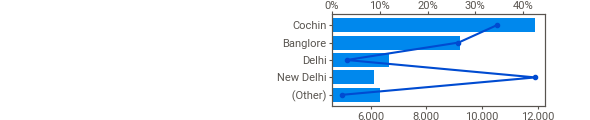
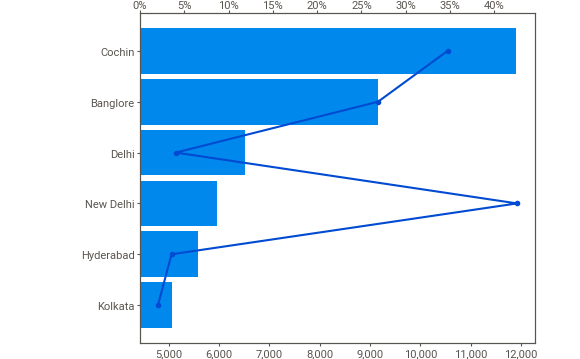
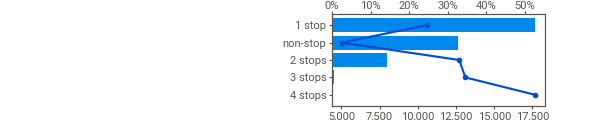
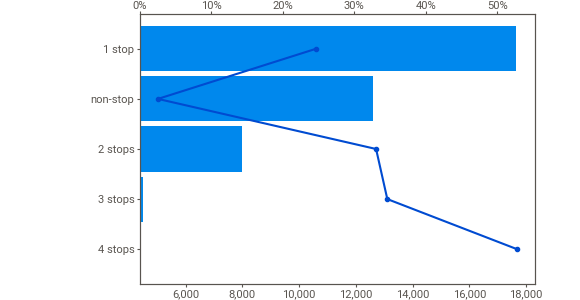
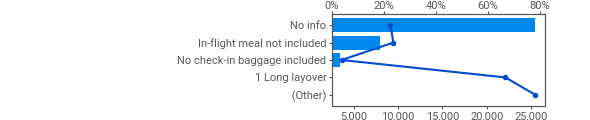
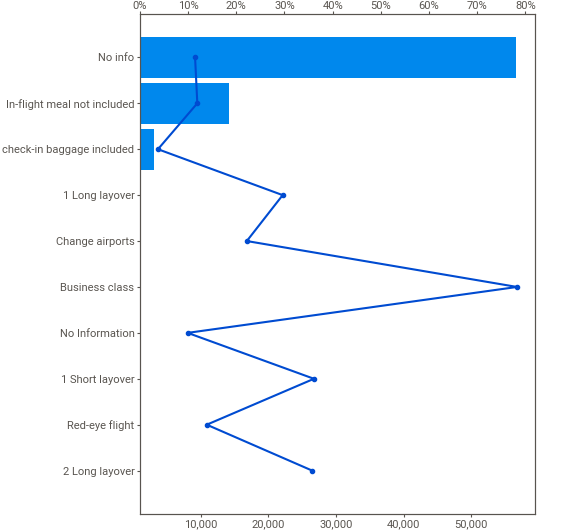
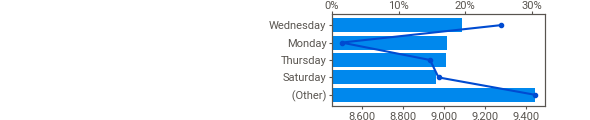
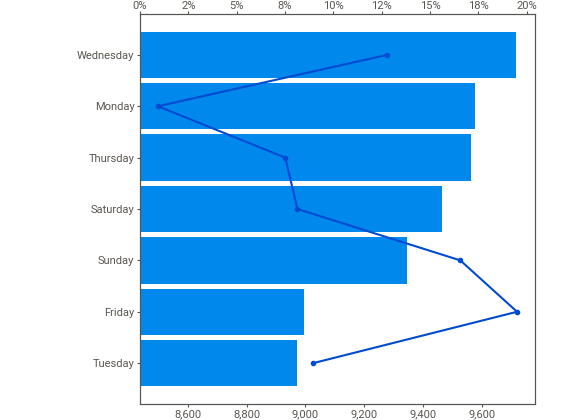
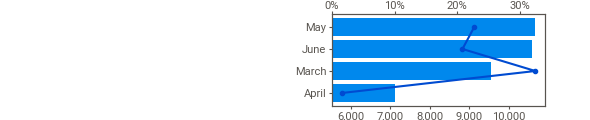
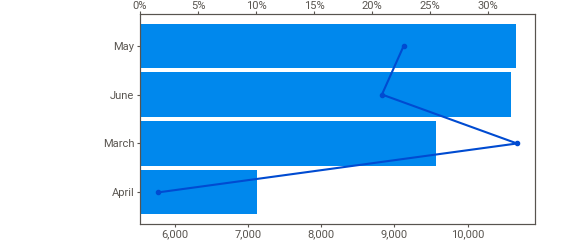
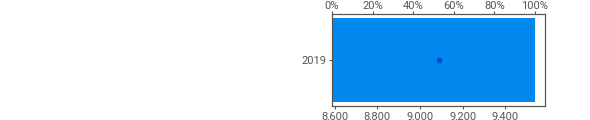
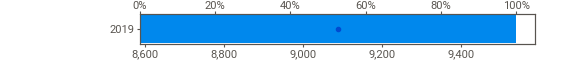
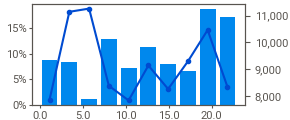
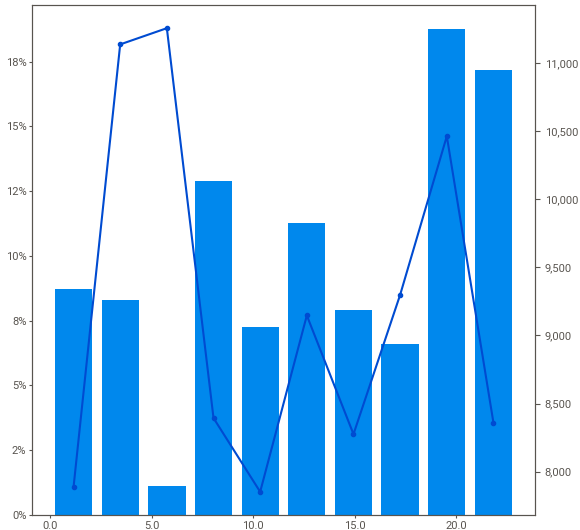
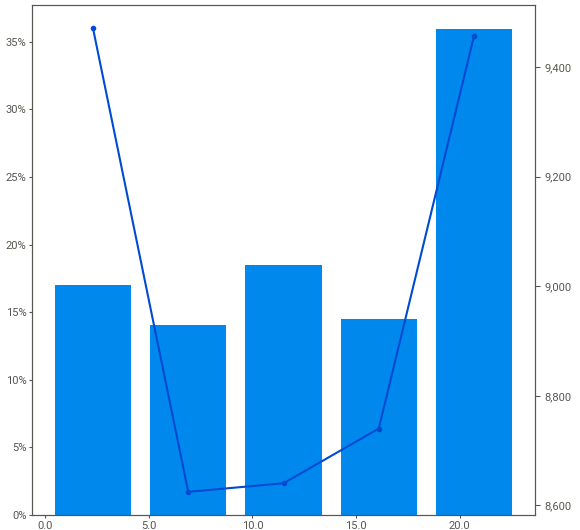
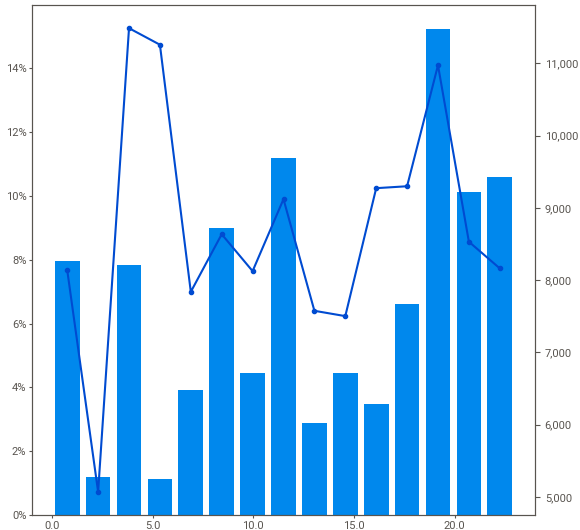
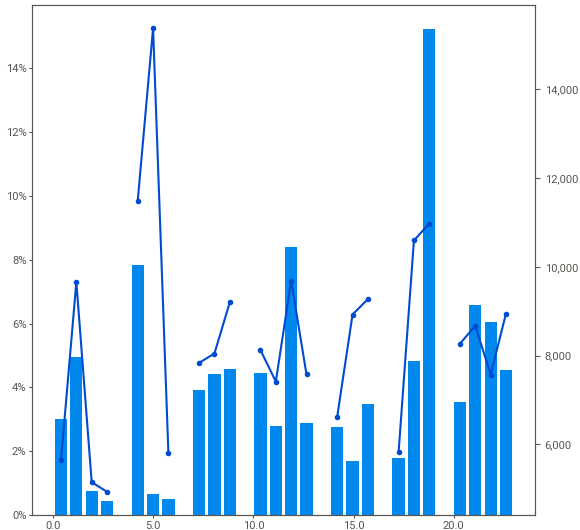
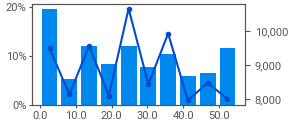
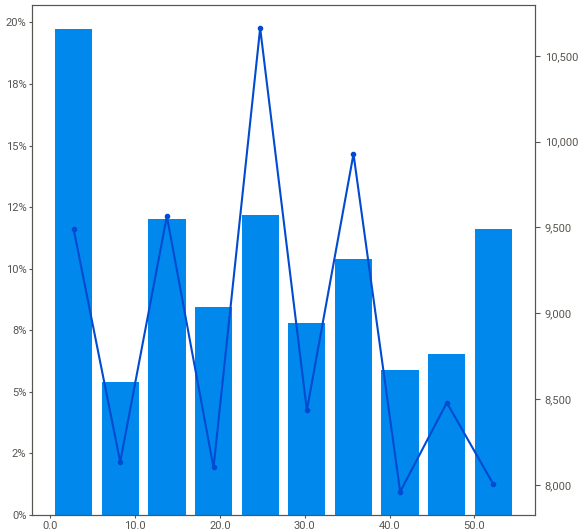
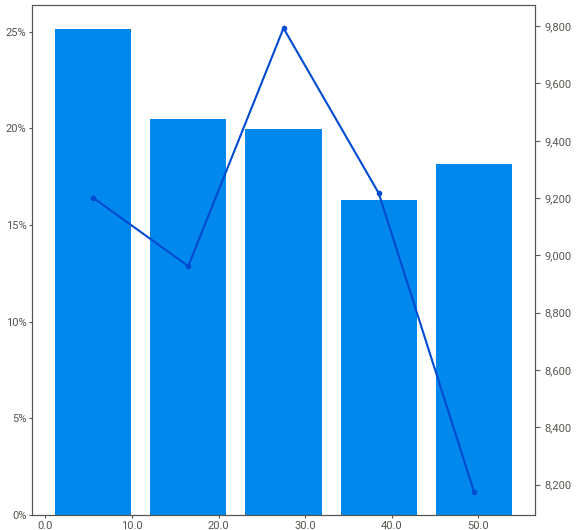
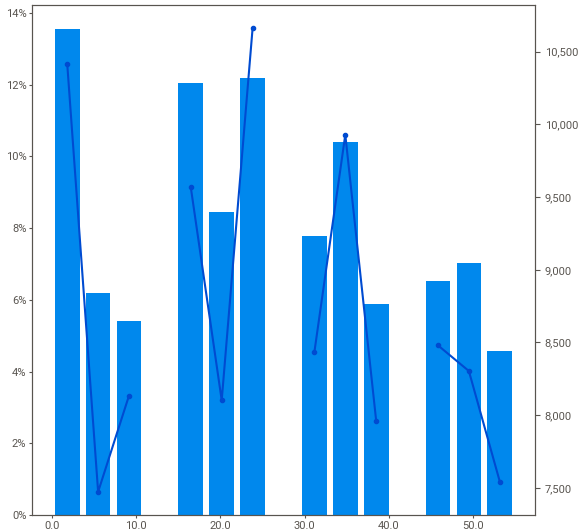
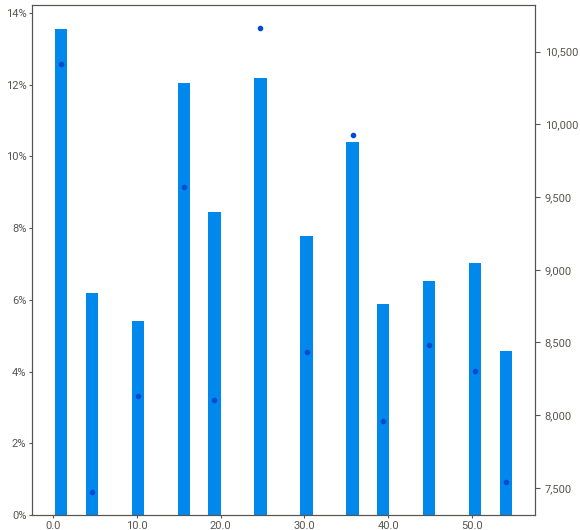
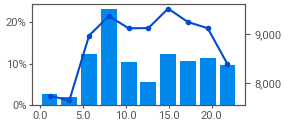
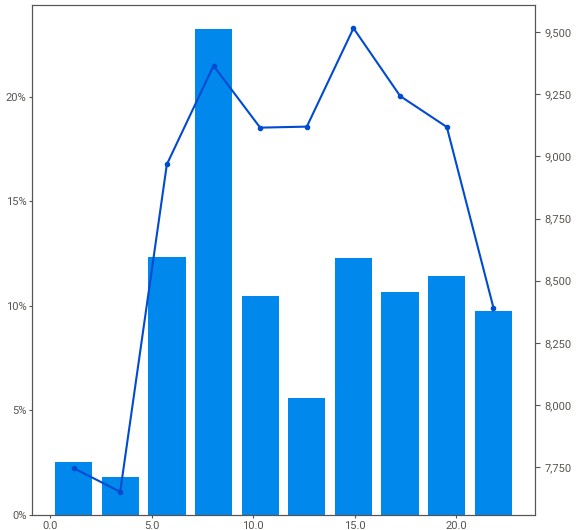
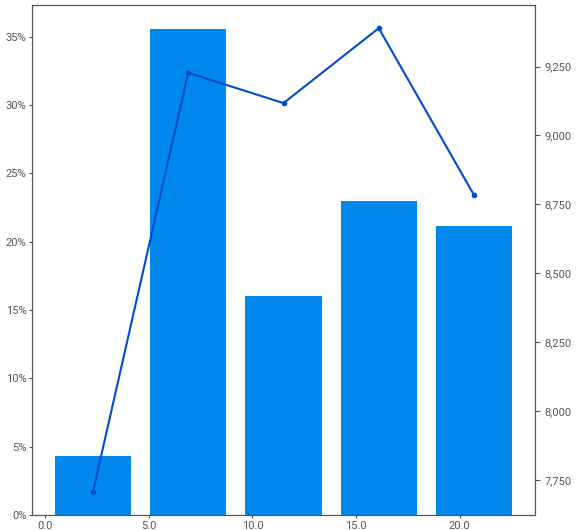
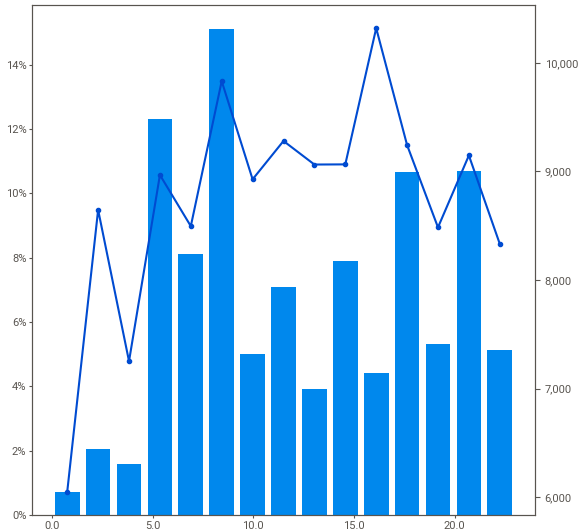
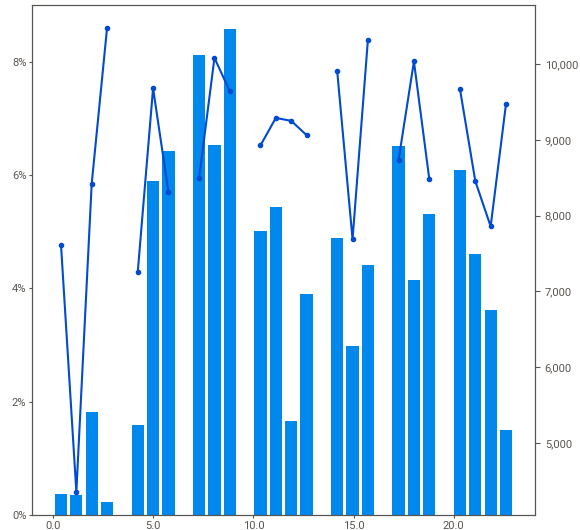
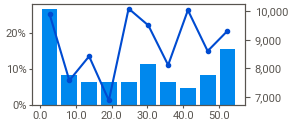
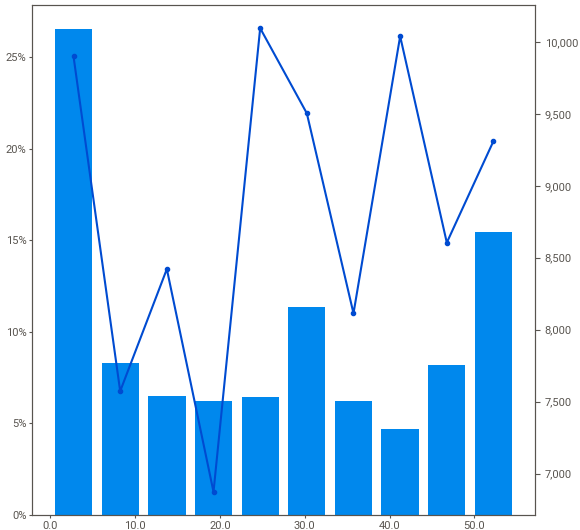
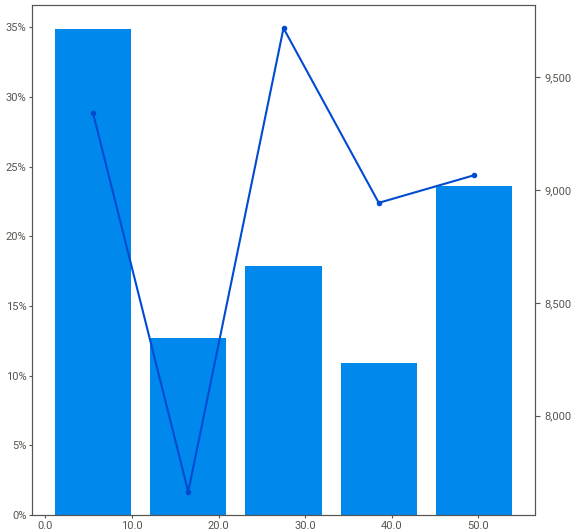
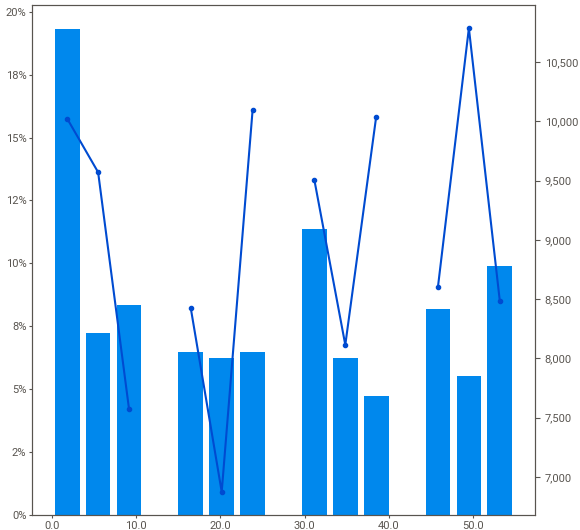
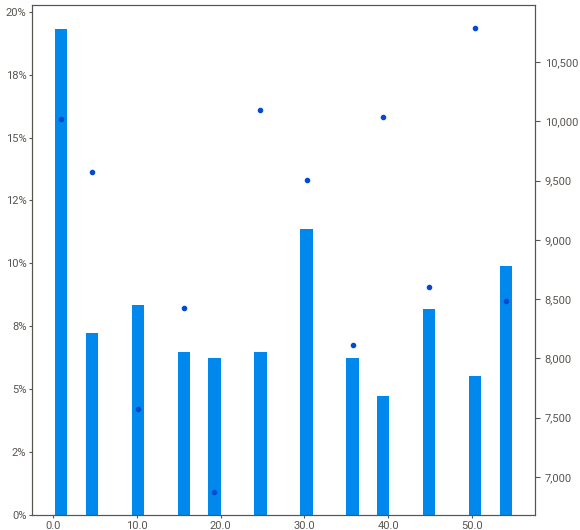
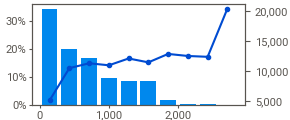
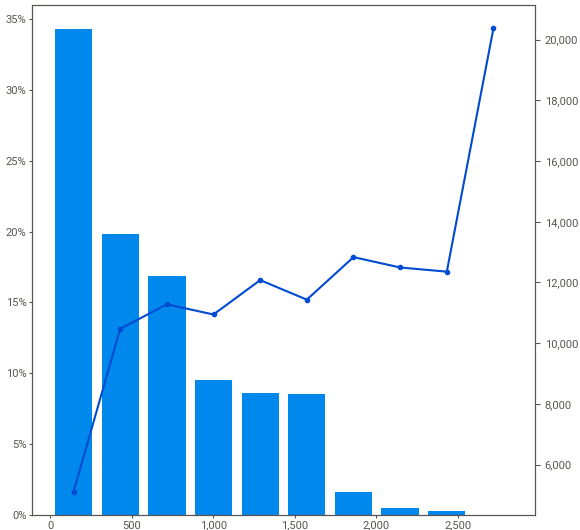
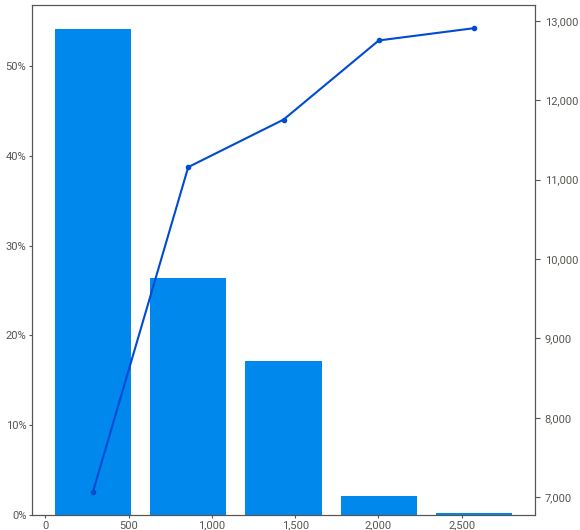
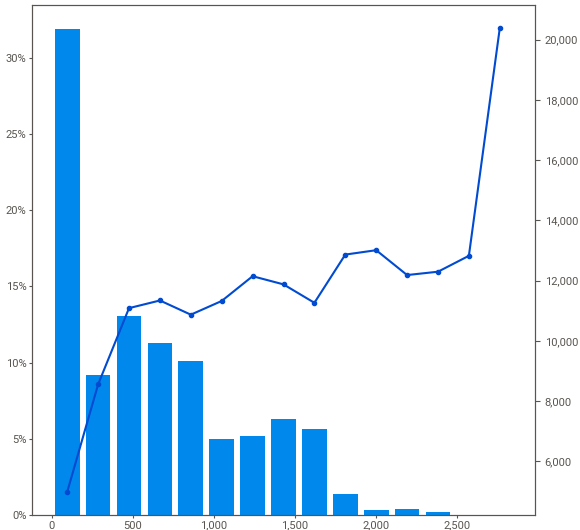
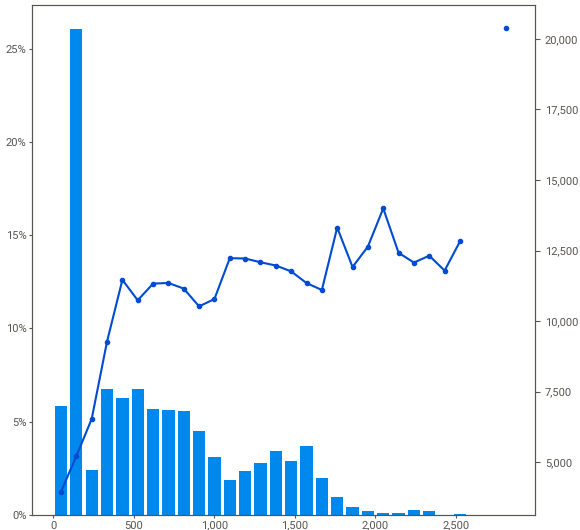
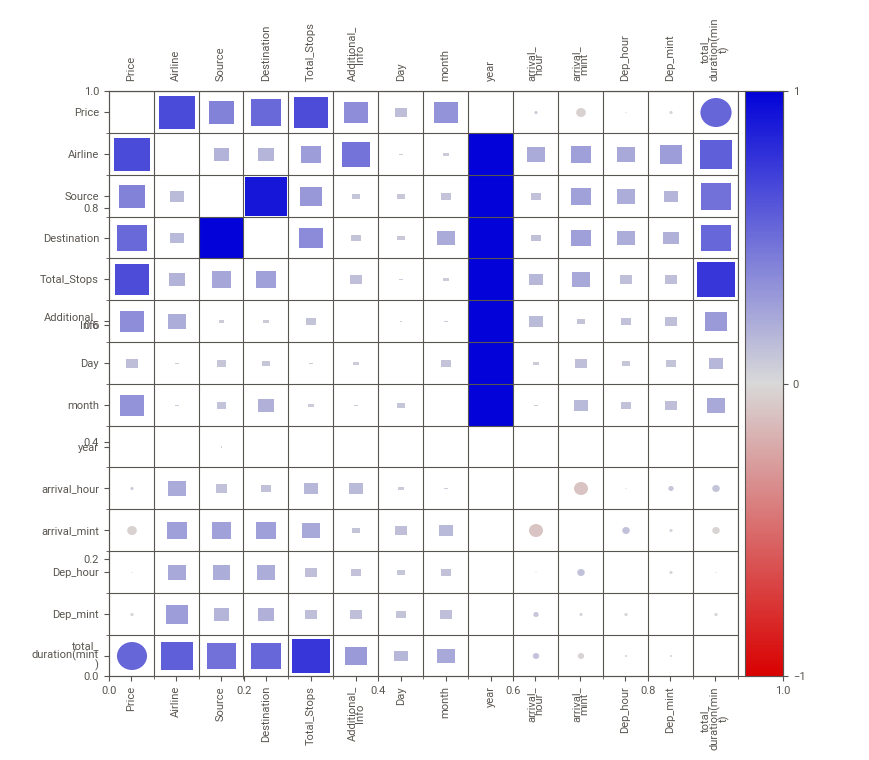
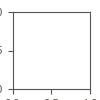

In [40]:
report.show_notebook()

In [41]:
correlation_matrix=df[numerical].corr()
correlation_matrix

,Price,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint)
Price,1.000000,NaN,0.024264,-0.086155,0.006819,-0.024492,0.506369
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_hour,0.024264,NaN,1.000000,-0.154362,0.005215,0.043054,0.051434
arrival_mint,-0.086155,NaN,-0.154362,1.000000,0.067909,-0.017594,-0.069655
Dep_hour,0.006819,NaN,0.005215,0.067909,1.000000,-0.024806,0.002001
Dep_mint,-0.024492,NaN,0.043054,-0.017594,-0.024806,1.000000,-0.018940
total_duration(mint),0.506369,NaN,0.051434,-0.069655,0.002001,-0.018940,1.000000


here we can see the year not affacting or showing the relationship with the rest futurre so we drop this column from the dataset 

<Axes: >

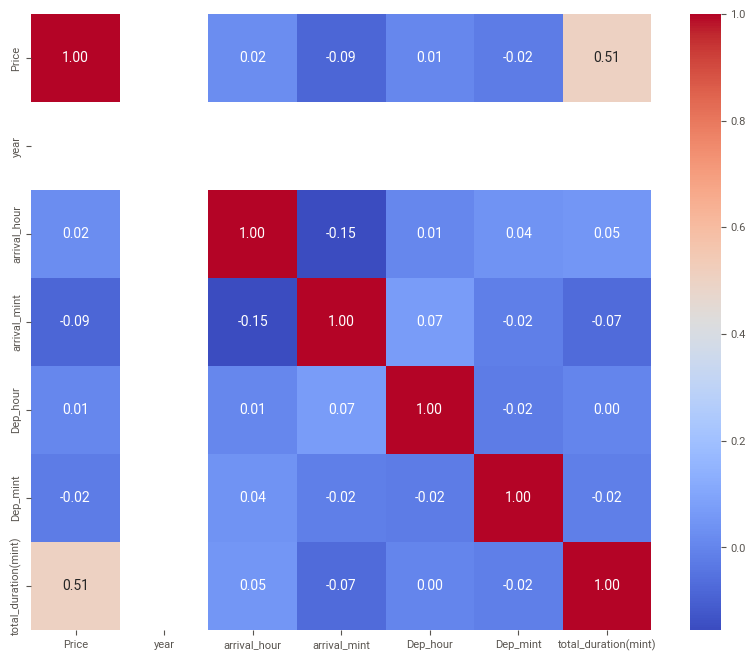

In [42]:
plt.figure(figsize=(10, 8))  

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


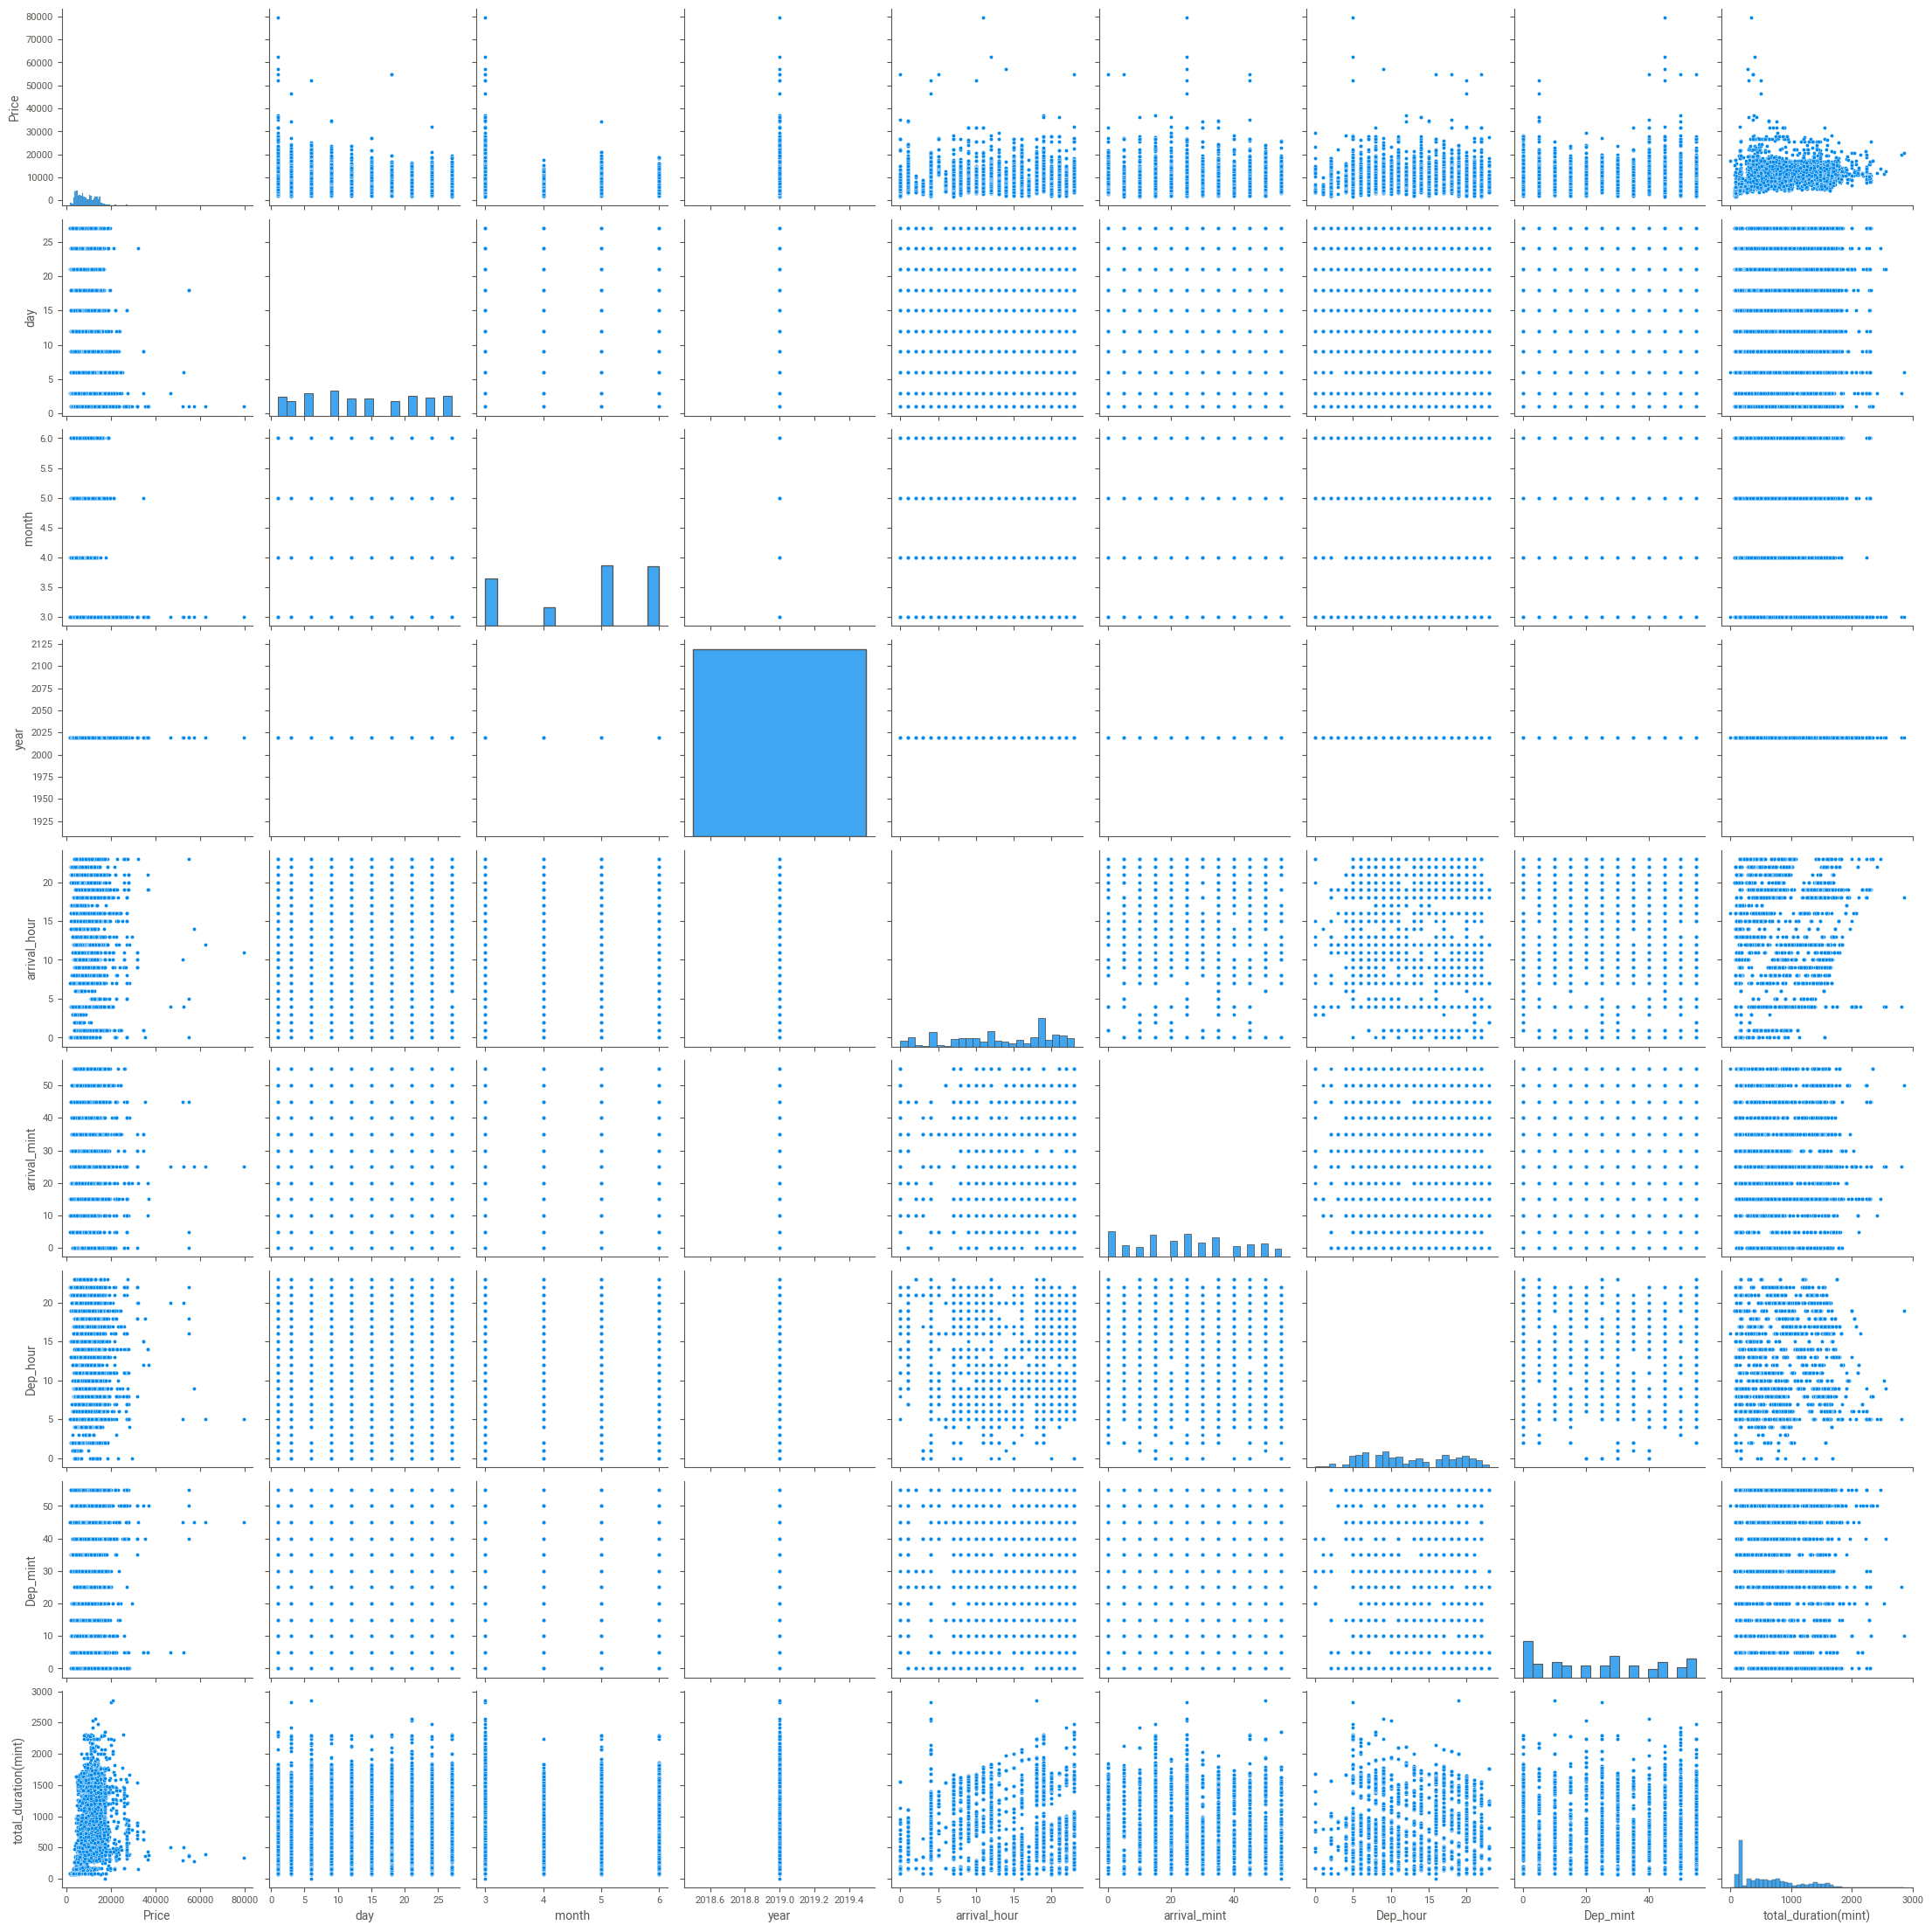

In [80]:
sns.pairplot(df[numerical])

### Analysing The categorical data

<Axes: xlabel='Price', ylabel='Airline'>

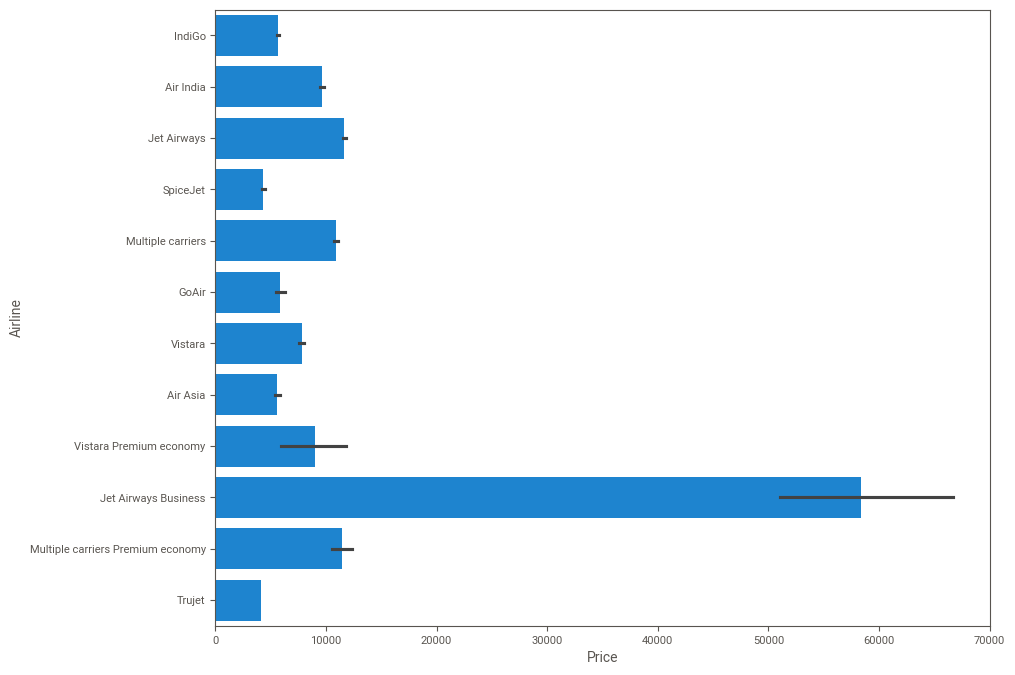

In [43]:
plt.figure(figsize=(10, 8))  # Adjust the figur size here

sns.barplot(df,y='Airline',x='Price')

In [44]:
grouped_agg=df.groupby('Airline')['Price'].agg(['mean','count','sum'])
grouped_agg.head()

,mean,count,sum
Airline,,,
Air Asia,5590.260188,319,1783293
Air India,9611.210616,1752,16838841
GoAir,5861.056701,194,1137045
IndiGo,5673.682903,2053,11648071
Jet Airways,11643.923357,3849,44817461


<Axes: xlabel='count', ylabel='Airline'>

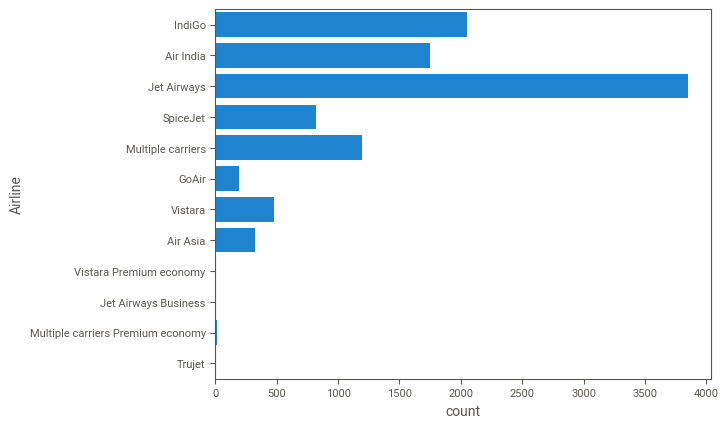

In [45]:
sns.countplot(df,y='Airline')

<Axes: xlabel='Price', ylabel='Additional_Info'>

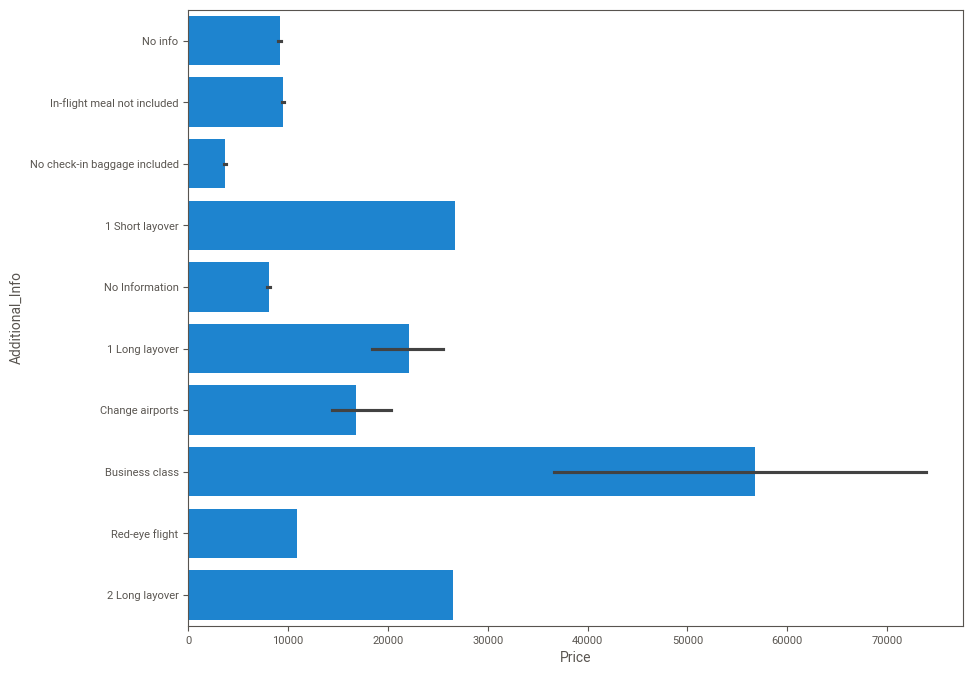

In [46]:
plt.figure(figsize=(10, 8))  # Adjust the figur size here

sns.barplot(df,x='Price',y='Additional_Info')

<Axes: xlabel='Price', ylabel='Total_Stops'>

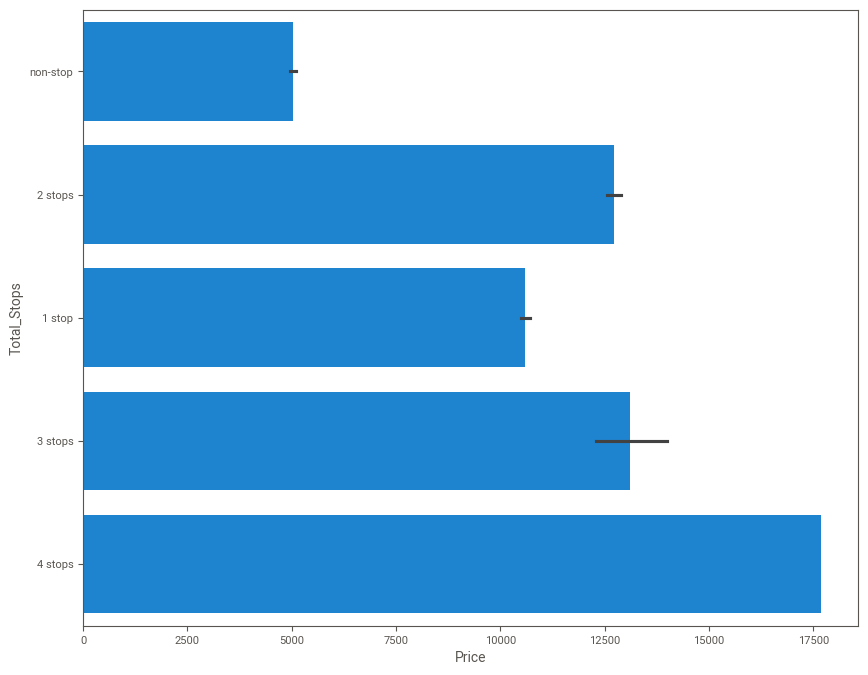

In [47]:
plt.figure(figsize=(10, 8))  # Adjust width and height of the figure
sns.barplot(df,x='Price',y='Total_Stops',)

<Axes: xlabel='Total_Stops', ylabel='count'>

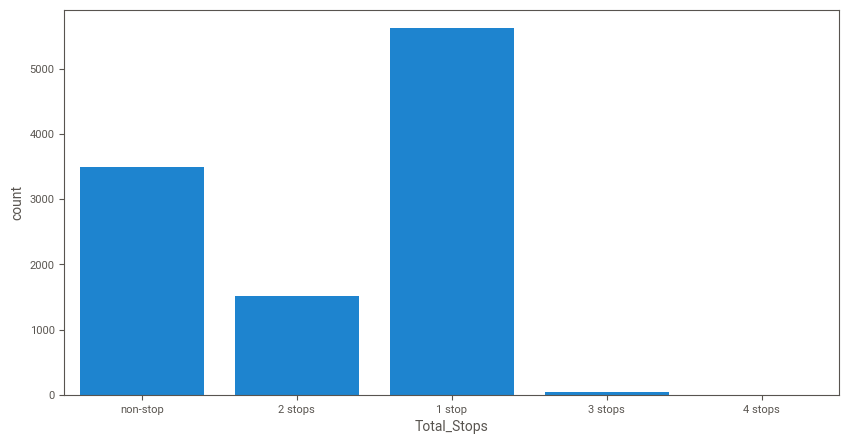

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Total_Stops')


<Axes: xlabel='Destination', ylabel='Price'>

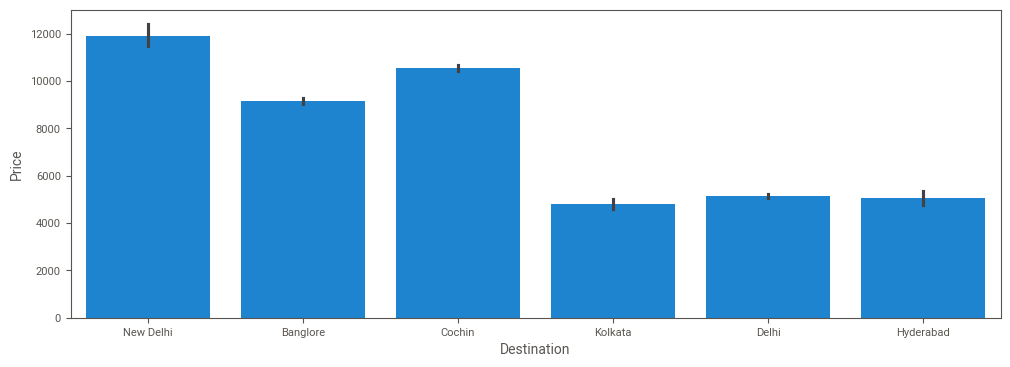

In [49]:
plt.figure(figsize=(12,4))
sns.barplot(df,x='Destination',y='Price')

<Axes: xlabel='Source', ylabel='Price'>

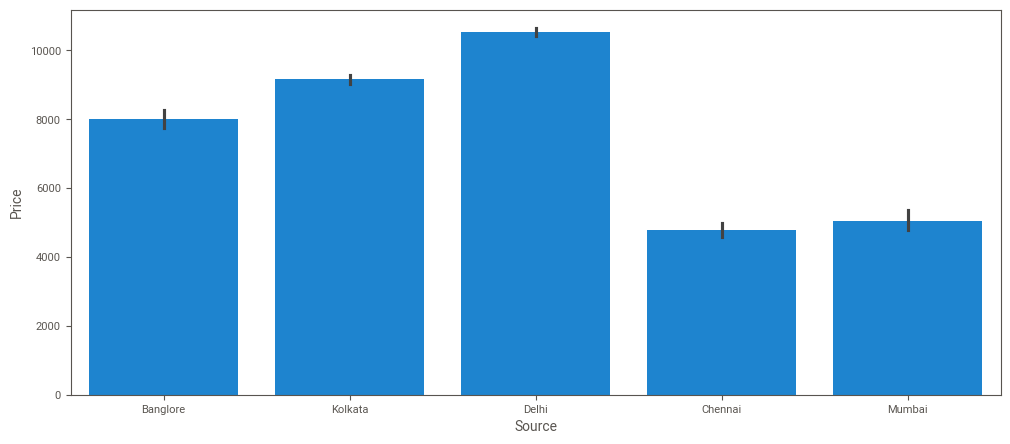

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(df,x='Source',y='Price')

<Axes: xlabel='Source', ylabel='count'>

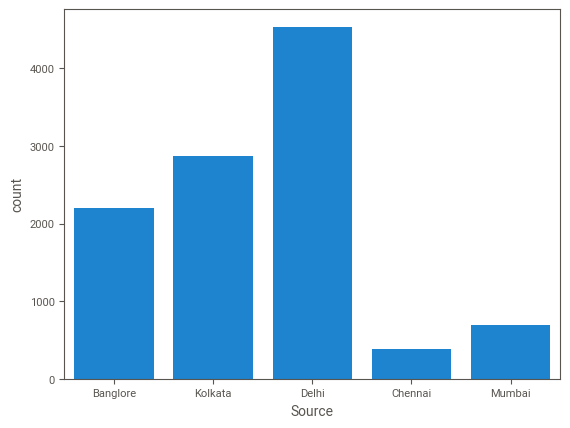

In [51]:
sns.countplot(df,x='Source')

<Axes: xlabel='Day', ylabel='Price'>

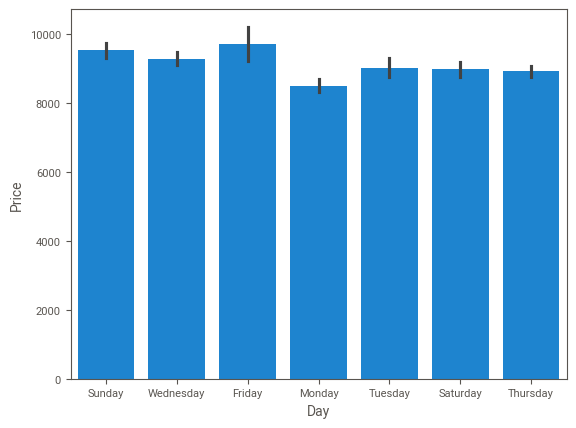

In [53]:
sns.barplot(df,x='Day',y='Price')

<Axes: xlabel='month', ylabel='Price'>

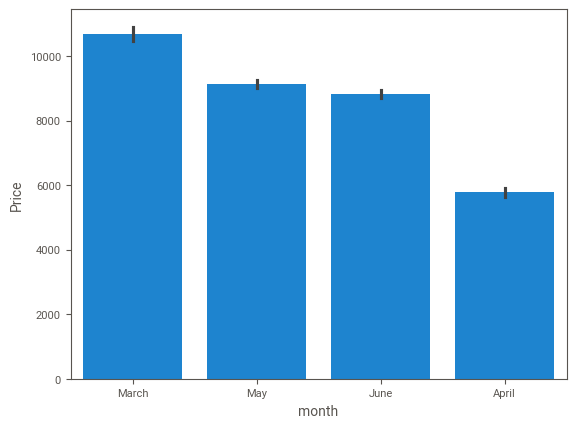

In [55]:
sns.barplot(df,x='month',y='Price')

## Analysisng the numerical data

<Axes: xlabel='Price'>

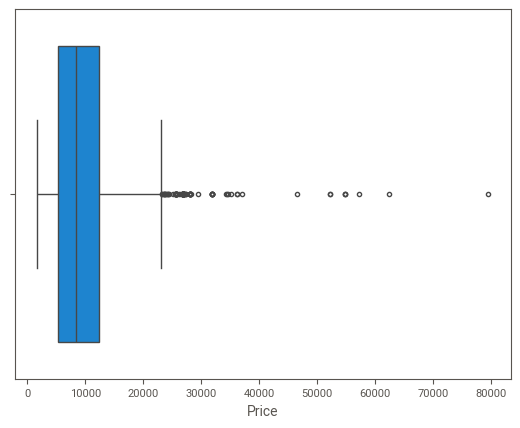

In [74]:
sns.boxplot(df,x='Price')

In [56]:
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if df[col].dtype != 'object']
print(categorical)
print(numerical)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Day', 'month']
['Price', 'year', 'arrival_hour', 'arrival_mint', 'Dep_hour', 'Dep_mint', 'total_duration(mint)']


In [61]:
y=df['Price']

In [57]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops'].value_counts()

In [61]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [62]:
ordina=OrdinalEncoder()
# df['Total_Stops'] = ordina.fit_transform(df[['Total_Stops']])


In [63]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})


In [64]:
df['Total_Stops'].value_counts()

Total_Stops
1    5626
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [65]:
df['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [66]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,month,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint)
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,Sunday,March,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,Wednesday,May,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,Sunday,June,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,Sunday,May,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,Friday,March,2019,21,35,16,50,285


In [67]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Route                   0
Total_Stops             0
Additional_Info         0
Price                   0
Day                     0
month                   0
year                    0
arrival_hour            0
arrival_mint            0
Dep_hour                0
Dep_mint                0
total_duration(mint)    0
dtype: int64

In [69]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [70]:
onh=OneHotEncoder()
encoded_array=onh.fit_transform(df[['Airline','Source','Destination','Day','month','Day','month','Additional_Info']]).toarray()

In [71]:
encoded_df = pd.DataFrame(encoded_array, columns=onh.get_feature_names_out(['Airline','Source','Destination','Day','month','Day','month','Additional_Info']))


In [72]:
df_new = pd.concat([df.drop(['Airline','Source','Destination','Day','month','Day','month','Additional_Info'], axis=1), encoded_df], axis=1)
df_new.head()

,Route,Total_Stops,Price,year,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint),Airline_Air Asia,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Information,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,BLR → DEL,0,3897,2019,1,10,22,20,170,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,CCU → IXR → BBI → BLR,2,7662,2019,13,15,5,50,445,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,DEL → LKO → BOM → COK,2,13882,2019,4,25,9,25,1140,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CCU → NAG → BLR,1,6218,2019,23,30,18,5,325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,BLR → NAG → DEL,1,13302,2019,21,35,16,50,285,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Route                                         10683 non-null  object 
 1   Total_Stops                                   10683 non-null  int64  
 2   Price                                         10683 non-null  int64  
 3   year                                          10683 non-null  int32  
 4   arrival_hour                                  10683 non-null  int32  
 5   arrival_mint                                  10683 non-null  int32  
 6   Dep_hour                                      10683 non-null  int32  
 7   Dep_mint                                      10683 non-null  int32  
 8   total_duration(mint)                          10683 non-null  int64  
 9   Airline_Air Asia                              10683 non-null 

In [76]:
df.shape

(10683, 15)

In [81]:
X=df_new.drop(['Price','Route','year'],axis=1)

In [82]:
X.head()

,Total_Stops,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Information,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,1,10,22,20,170,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,13,15,5,50,445,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,4,25,9,25,1140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,23,30,18,5,325,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,21,35,16,50,285,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10683 non-null  int64  
 1   arrival_hour                                  10683 non-null  int32  
 2   arrival_mint                                  10683 non-null  int32  
 3   Dep_hour                                      10683 non-null  int32  
 4   Dep_mint                                      10683 non-null  int32  
 5   total_duration(mint)                          10683 non-null  int64  
 6   Airline_Air Asia                              10683 non-null  float64
 7   Airline_Air India                             10683 non-null  float64
 8   Airline_GoAir                                 10683 non-null  float64
 9   Airline_IndiGo                                10683 non-null 

In [84]:
y=df['Price']

### Data Splitting


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [86]:
X_train.head()

,Total_Stops,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Information,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
8990,2,16,35,6,30,605,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3684,1,12,35,11,30,1505,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1034,1,22,5,15,45,380,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3909,1,1,35,12,50,765,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3088,2,19,15,17,15,1560,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
X_train.shape

(8546, 61)

In [89]:
X_test.head()

,Total_Stops,arrival_hour,arrival_mint,Dep_hour,Dep_mint,total_duration(mint),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Information,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
6076,1,18,15,5,45,750,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,1,19,35,10,35,540,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7313,1,19,50,14,5,345,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5032,0,17,5,14,45,140,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2483,1,4,25,22,50,335,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
X_test.shape

(2137, 61)

## 4. Model Selection


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
reg